<a href="https://colab.research.google.com/github/alexanderjireland/ff-draft-optimizer/blob/main/notebooks/ff_projections_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ff_projections import *
import pandas as pd
import numpy as np

In [2]:
trace, X_test, y_test = split_data_and_train_pm_model('/content/projection_models_data_06_02.csv')

Fitting preprocessing pipeline...
Fitting logistic regression model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.80
Precision: 0.82
Recall: 0.85
Confusion Matrix:
[[274  95]
 [ 78 426]]
Running probabilistic model...
Fitting initial linear regression model to get priors...
Mean of coefficients: [ 1.07983072e+00  1.47647820e+00 -5.51825099e-01 -1.03588792e-01
 -8.19480955e-01 -2.25552696e-01  3.93817247e-01  3.98538614e-01
 -1.41487482e-01  2.51177569e-01  1.44456649e+00 -8.01971030e-01
 -9.85605432e-01  3.56598479e-01  3.01850868e-01  4.85750843e-01
 -3.09765119e-01  2.69531440e-01 -3.83735439e-01 -4.72657216e-01
 -2.60516357e-01 -3.35370134e-01 -3.80627162e-01 -6.16672015e-01
  1.09814743e-01 -1.93342725e-01 -7.15487957e-01 -4.91353427e-01
  8.94319704e-02  1.35742048e+00 -2.66299652e-01 -7.89286080e-01
 -3.24261233e-01  2.00185529e-01  7.84974774e-01 -8.19384309e-01
 -1.27721633e+00  1.48567618e-01 -3.31100684e-01  2.38019624e-01
 -8.26462391e-01  8.43177337e-01  2.61957434e-02 -2.36511216e-01
  3.46710070e-01 -1.29650112e-01  1.66476471e-01 -3.81121361e-01
 -1.64056722e-01 -5.27744

Output()

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')
directory = "/content/drive/MyDrive/PyMC_Models"
os.makedirs(directory, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
save_trace_filepath = "/content/drive/MyDrive/PyMC_Models/full_send_model_06_03.nc"
az.to_netcdf(trace, save_trace_filepath)

'/content/drive/MyDrive/PyMC_Models/full_send_model_06_03.nc'

In [5]:
# Load in trace
save_trace_filepath = "/content/drive/MyDrive/PyMC_Models/full_send_model_06_03.nc"
trace = az.from_netcdf(save_trace_filepath)

array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

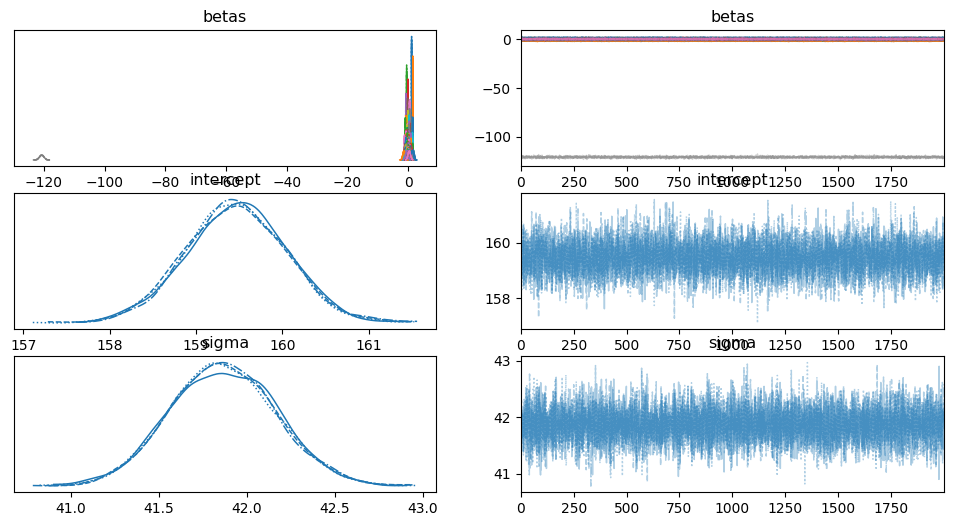

In [6]:
az.plot_trace(trace)

In [7]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],1.080,0.030,1.023,1.136,0.000,0.000,14900.0,6279.0,1.0
betas[1],1.476,0.035,1.413,1.544,0.000,0.000,12994.0,5540.0,1.0
betas[2],-0.552,0.041,-0.630,-0.476,0.000,0.001,14629.0,5749.0,1.0
betas[3],-0.104,0.046,-0.191,-0.020,0.000,0.001,16363.0,5598.0,1.0
betas[4],-0.819,0.054,-0.920,-0.716,0.000,0.001,13755.0,5930.0,1.0
...,...,...,...,...,...,...,...,...,...
betas[125],0.266,0.393,-0.467,1.023,0.003,0.005,16708.0,6162.0,1.0
betas[126],0.300,0.394,-0.433,1.053,0.003,0.005,15756.0,5878.0,1.0
betas[127],-120.703,0.720,-121.980,-119.269,0.009,0.007,7017.0,6266.0,1.0
intercept[0],159.468,0.582,158.324,160.512,0.007,0.006,7232.0,6450.0,1.0


PC1             68.012084
PC2             -0.019538
PC3            -11.473354
PC4             13.070029
PC5             28.089067
                  ...    
PC124           -4.553537
PC125            1.381015
PC126           -2.239772
PC127           -2.095985
is_draftable     0.000000
Name: 0, Length: 128, dtype: float64
fantasy_pts    0.0
Name: 3865, dtype: float64
Projected season points (median): 214.8
95% credible interval: [128.6, 300.4]
90% credible interval: [142.8, 287.2]
85% credible interval: [151.9, 278.8]
75% credible interval: [164.1, 265.0]
50% credible interval: [185.0, 243.5]
Probability points > 200: 63.04%


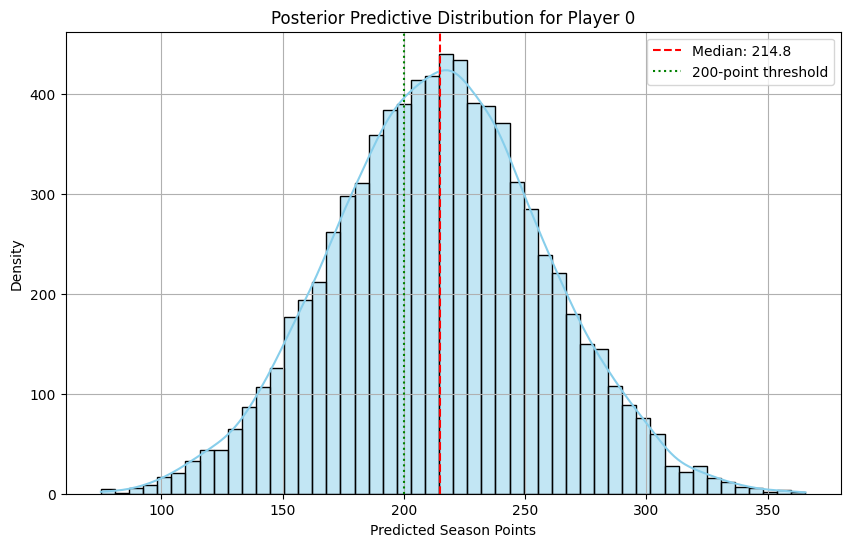

In [8]:
predict_player(0, trace, X_test, y_test)

PC1             42.406856
PC2             14.959529
PC3             -4.045227
PC4              9.648118
PC5             20.094513
                  ...    
PC124           -1.611975
PC125            2.265978
PC126           -0.021827
PC127            1.498882
is_draftable     0.000000
Name: 350, Length: 128, dtype: float64
fantasy_pts    257.36
Name: 9907, dtype: float64
Projected season points (median): 242.6
95% credible interval: [158.4, 326.9]
90% credible interval: [171.6, 313.4]
85% credible interval: [180.7, 304.7]
75% credible interval: [193.9, 291.9]
50% credible interval: [214.8, 271.4]
Probability points > 200: 84.25%


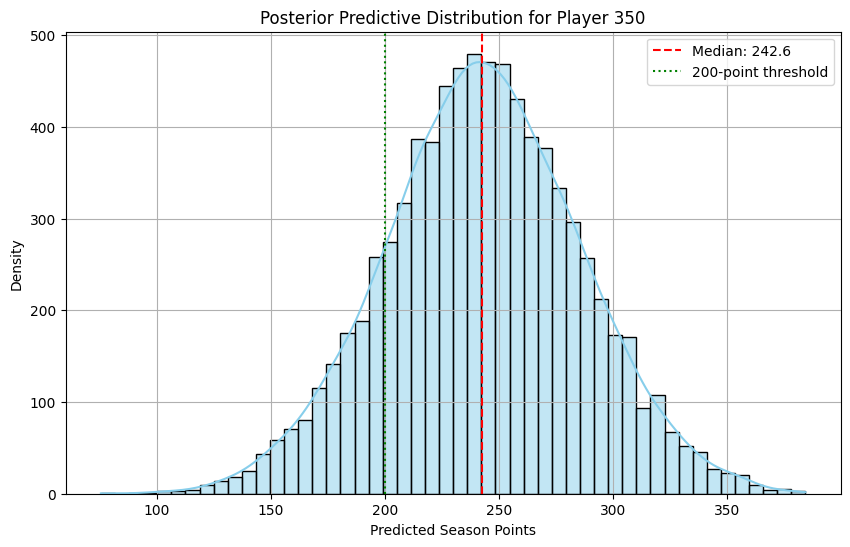

In [9]:
predict_player(350, trace, X_test, y_test)

PC1              0.104425
PC2             18.301917
PC3            -22.664682
PC4             -1.576018
PC5             13.184499
                  ...    
PC124            2.097275
PC125           -0.901057
PC126            2.004975
PC127           -2.139627
is_draftable     0.000000
Name: 399, Length: 128, dtype: float64
fantasy_pts    152.6
Name: 10076, dtype: float64
Projected season points (median): 214.5
95% credible interval: [128.5, 297.9]
90% credible interval: [143.7, 284.4]
85% credible interval: [152.0, 276.2]
75% credible interval: [165.7, 263.5]
50% credible interval: [186.2, 243.2]
Probability points > 200: 63.45%


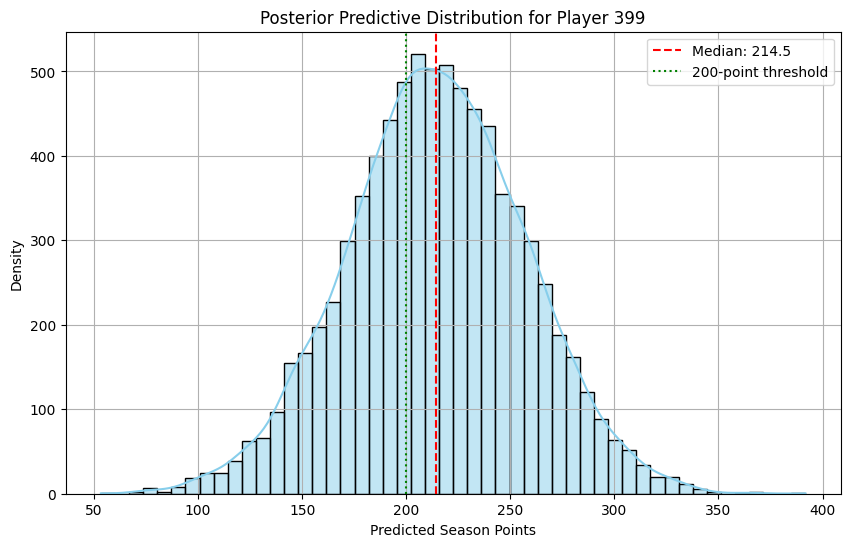

In [10]:
predict_player(399, trace, X_test, y_test)

In [11]:
pm_train, pm_test = read_in_data_for_projections(filepath='/content/projection_models_data_06_02.csv')

In [12]:
pm_test = pm_test.reset_index(drop=True)

In [13]:
pm_test.sample(20)

,season,gsis_id,full_name_all_players,fantasy_pts,ff_pts_prev_year,years_exp,Rank,ESPN,AVG,position_rank,...,significant_injury_prev_season,cum_player_mean_prev_season,cum_player_std_prev_season,cum_player_min_prev_season,cum_player_noninjured_min_prev_season,cum_player_max_prev_season,position_QB,position_RB,position_TE,position_WR
548,2024,00-0038134,Kenneth Walker III,181.20,190.30,2.0,42.0,43.0,41.4,17.0,...,1.0,189.700000,0.848528,189.10,NaN,190.30,False,True,False,False
596,2023,00-0037429,Raheem Blackshear,16.50,42.90,1.0,NaN,NaN,NaN,NaN,...,0.0,42.900000,NaN,42.90,42.90,42.90,False,True,False,False
283,2024,00-0033854,Dare Ogunbowale,51.70,7.30,7.0,550.0,NaN,412.0,132.0,...,0.0,38.800000,24.559927,7.30,7.30,75.30,False,True,False,False
323,2024,00-0033376,Patrick Ricard,8.80,16.20,7.0,429.0,305.0,397.5,101.0,...,0.0,18.366667,1.744324,16.20,16.20,20.70,False,True,False,False
83,2023,00-0033040,Tyreek Hill,355.20,336.90,7.0,6.0,6.0,6.3,3.0,...,1.0,273.742857,63.810314,188.30,NaN,336.90,False,False,False,True
603,2024,00-0037840,Kyren Williams,272.10,254.80,2.0,15.0,16.0,16.0,7.0,...,0.0,142.650000,158.604051,30.50,30.50,254.80,False,True,False,False
755,2023,00-0038979,Cedric Tillman,36.90,NaN,0.0,561.0,464.0,464.0,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True
2,2023,00-0026158,Joe Flacco,100.84,42.68,15.0,476.0,374.0,374.0,66.0,...,0.0,164.216000,77.836143,23.82,23.82,262.44,True,False,False,False
676,2023,00-0038597,Chase Brown,47.20,NaN,0.0,255.0,NaN,246.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False
795,2024,00-0039384,Tyrone Tracy Jr.,173.70,NaN,0.0,211.0,NaN,217.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False


In [14]:
filepath = '/content/drive/MyDrive/PyMC_Models/full_send_model_06_03_predictions.csv'
df = create_probabilistic_predictions(trace, pm_test, X_test, save_to_csv=True, filepath=filepath)
df

,player_name,median_prediction,credible_interval_95_lower,credible_interval_95_upper,credible_interval_85_lower,credible_interval_85_upper,probability_gt_300,probability_gt_200
0,Aaron Rodgers,214.950404,130.877708,301.444797,152.295427,277.426794,0.02675,0.636500
1,Aaron Rodgers,196.752260,108.558580,283.445089,132.354553,260.536750,0.00775,0.468875
2,Joe Flacco,6.002537,-75.457456,89.180452,-53.399832,67.194757,0.00000,0.000000
3,Joe Flacco,20.663529,-61.811941,103.330791,-40.371540,81.262862,0.00000,0.000000
4,Matthew Stafford,215.088084,130.293020,297.046018,152.603486,276.886959,0.02150,0.639500
...,...,...,...,...,...,...,...,...
868,Nikko Remigio,28.772252,-56.397811,111.447226,-32.076633,89.600176,0.00000,0.000000
869,Chris Collier,11.758639,-71.143336,95.027238,-49.067224,72.768874,0.00000,0.000000
870,Keon Coleman,154.523247,73.900378,237.022605,94.868911,215.391689,0.00000,0.141750
871,Jalen Coker,27.312447,-57.256895,108.192325,-34.262181,88.243701,0.00000,0.000000
